In [1]:
# This file is for testing and designing various plots before putting them into report_plots.py
from report_plots import init
import matplotlib.pyplot as plt
import matplotlib as mpl
from player import DataEnum, Player
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from utils.data_plotter import replace_with_space_separated_columns

In [3]:
Cristiano_Ronaldo = Player("Cristiano Ronaldo")
Kevin_De_Bruyne = Player("Kevin De Bruyne")
Virgil_van_Dijk = Player('Virgil van Dijk')

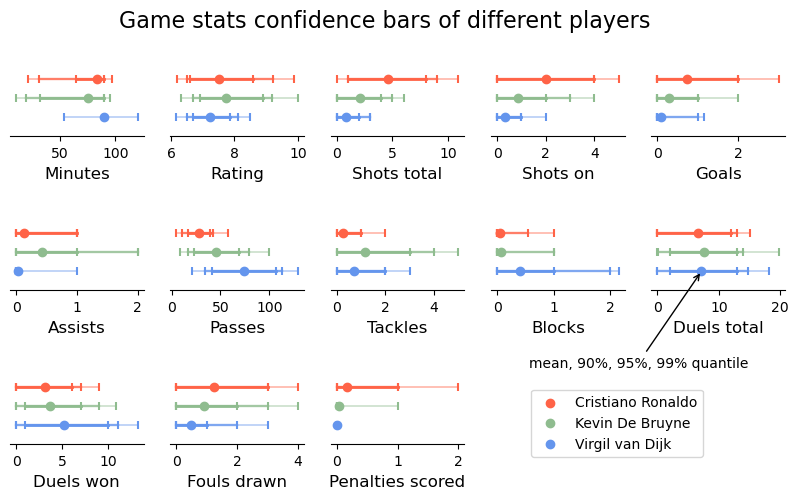

In [37]:
quantiles = [0.9, 0.95, 0.99]
fig, axes = plt.subplots(3, 5, figsize=(10,5))
axes.flatten()[-1].set_visible(False)
axes.flatten()[-2].set_visible(False)
plt.subplots_adjust(hspace=1)

player_colors = {}
player_colors[Cristiano_Ronaldo] = "tomato"
player_colors[Kevin_De_Bruyne] = "darkseagreen"
player_colors[Virgil_van_Dijk] = "cornflowerblue"

columns = replace_with_space_separated_columns(Cristiano_Ronaldo.player_stats).columns[3:]
for c, ax in zip(columns, axes.flatten()):
    for i, player in enumerate([Cristiano_Ronaldo, Kevin_De_Bruyne, Virgil_van_Dijk]):
        ax.set_ylim([-3, 1])
        ax.spines[['top', 'right', 'left']].set_visible(False)
        stats = replace_with_space_separated_columns(player.player_stats)
        mean = stats[c].mean()
        ax.scatter(mean, -i, marker="o", color=player_colors[player], label=player.name)
        ax.set_yticks([])
        for n, q in enumerate(quantiles):
            lower = stats[c].quantile(1-q)
            higher = stats[c].quantile(q)
            ax.scatter([lower, higher], [-i,-i], marker="|", color=player_colors[player])
            ax.plot(np.linspace(lower, higher, 2), [-i,-i], linewidth=2-n*0.3, color=player_colors[player], alpha=1-n*0.3)
        ax.set_title(c, y = -0.65)

axes[1,4].annotate("mean, 90%, 95%, 99% quantile", xy =(7.2, -2),
                xytext =(-21, -7), 
                arrowprops = dict(arrowstyle = "->"))

fig.suptitle("Game stats confidence bars of different players", fontsize=16)
lgd = axes[1,4].legend(bbox_to_anchor=(0.44, -1.2))

In [9]:
Cristiano_Ronaldo.aggregated_tweets.avg_likes.quantile(0.9999)

25250.36620949619

In [4]:
all_players = init("test_plots")

NameError: name 'all_players' is not defined

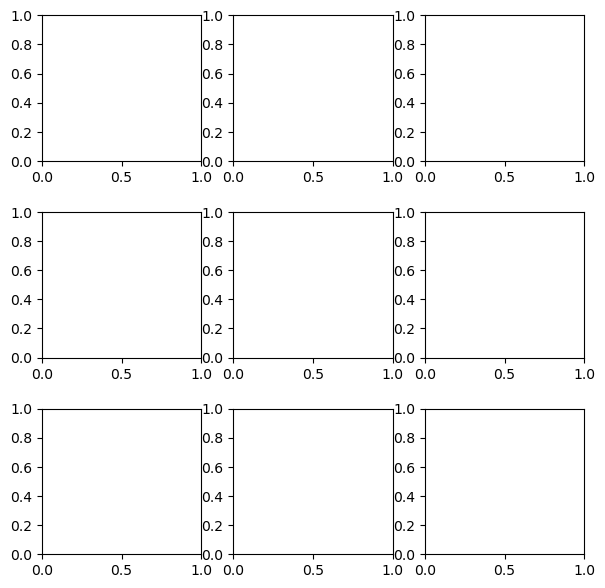

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(7,7))
wanted_columns = all_players.combined.aggregated_tweets.columns[2:]
for i, ax in enumerate(axes.flatten()):
    ax = all_players.combined.plot_col_kde(DataEnum.TWEETS_AGG, wanted_columns[i], ax, trim=(0, 99))
    ax.set_xlabel(wanted_columns[i])

fig.suptitle('Probability densities for aggregated tweets combined for all players', fontsize=16)
plt.tight_layout()